<a href="https://colab.research.google.com/github/SaiMeghanath/AI_Handwritten_Digit_Recognizer/blob/main/AI_Handwritten_Digit_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1 :Install & Import Dependencies**

In [10]:
# Install necessary libraries (if not already installed)
!pip install tensorflow matplotlib

# Import libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
!pip install gradio



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.9/321.9 kB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 120.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 6.4 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.


**Step 2 : Load & Preprocess the MNIST Dataset**

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


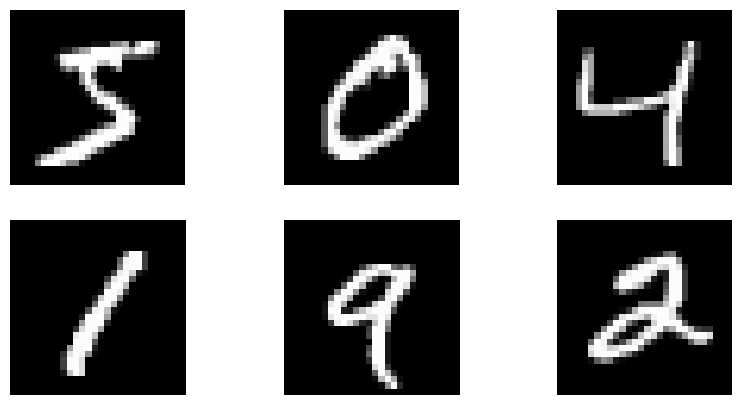

In [2]:
# Load the MNIST dataset
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images (convert pixel values from 0-255 to 0-1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Display a few images
plt.figure(figsize=(10, 5))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(x_train[i], cmap="gray")
    plt.axis("off")
plt.show()


** Step 3: Build the AI Model (CNN)**

In [3]:
# Create a CNN model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')  # 10 output neurons (digits 0-9)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Step 4: Train the Model**

In [4]:
# Train the model
model.fit(x_train.reshape(-1, 28, 28, 1), y_train, epochs=5, validation_data=(x_test.reshape(-1, 28, 28, 1), y_test))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9112 - loss: 0.2960 - val_accuracy: 0.9852 - val_loss: 0.0414
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9874 - loss: 0.0407 - val_accuracy: 0.9879 - val_loss: 0.0349
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9918 - loss: 0.0279 - val_accuracy: 0.9898 - val_loss: 0.0313
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9931 - loss: 0.0207 - val_accuracy: 0.9893 - val_loss: 0.0323
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9951 - loss: 0.0149 - val_accuracy: 0.9906 - val_loss: 0.0327


**Step 5: Evaluate the Model**

In [5]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test.reshape(-1, 28, 28, 1), y_test, verbose=2)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


313/313 - 1s - 2ms/step - accuracy: 0.9906 - loss: 0.0327
Test Accuracy: 99.06%


** Step 6: Make Predictions**

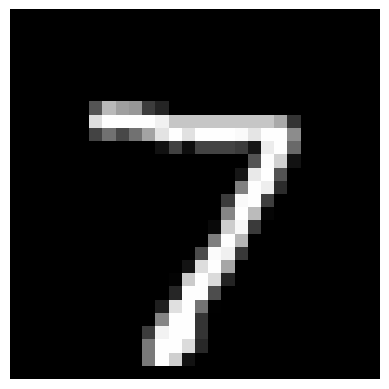

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step
Predicted Digit: 7


In [6]:
# Pick a test image
sample_image = x_test[0]
plt.imshow(sample_image, cmap="gray")
plt.axis("off")
plt.show()

# Predict the digit
sample_image = sample_image.reshape(1, 28, 28, 1)  # Reshape for the model
prediction = model.predict(sample_image)
predicted_digit = np.argmax(prediction)

print(f"Predicted Digit: {predicted_digit}")


** Step 7: Deploy with Gradio (Interactive Web App)**

In [11]:
import gradio as gr

# Define function for Gradio app
def predict_digit(image):
    image = image.convert('L').resize((28, 28))  # Convert to grayscale and resize
    image = np.array(image) / 255.0  # Normalize
    image = image.reshape(1, 28, 28, 1)  # Reshape for the model

    prediction = model.predict(image)
    return f"Predicted Digit: {np.argmax(prediction)}"

# Create Gradio interface
interface = gr.Interface(fn=predict_digit,
                         inputs=gr.Image(type="pil"),
                         outputs="text",
                         title="🖊️ Handwritten Digit Recognizer",
                         description="Draw a digit (0-9), and the AI will predict it!",
                         theme="default")

# Launch the app
interface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://849dc7aa29a3c67fd9.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
